### Investigate 18469 null dates in was_submitted_datetime_actual

In [5]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf  = load_df('filterDf')

###### Create Dataframe of null observations

In [3]:
nullDf = filterDf.filter(F.col('was_submitted_datetime_actual').isNull())

nullDf.count()

18469

18,469 null observations

###### Display distinct values

In [6]:
distinct_val(nullDf)

,0
assignment_attempt_number,1
assignment_max_attempts,1
is_manual_scoring_required,False


- assignment_attempt_number = 1
- assignment_max_attempts = 1
- is_manual_scoring_required = False

###### Compare dates with full sample

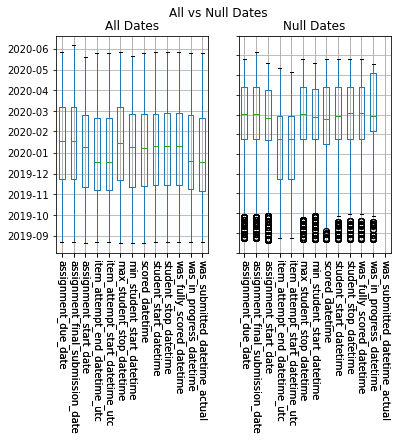

In [7]:
dual_date_boxplot(
    get_random_sample(filterDf),
    nullDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- Median shifted one and half months from 1/15/2020 to 3/2020
- All distributions right skewed
- Majority of dates in the last half of school year
- Similar caracteristics as the 16,582 zero values in final_score_unweighted

##### Crosstabulate with 16,582 zero final_score_unweighted

In [6]:
pdDf = get_random_sample(filterDf).withColumn(
                "zero_score",
                  F.when( F.col('final_score_unweighted') == 0, 'Yes').otherwise("No")
                ).withColumn(
                "null_date",
                  F.when( F.col('was_submitted_datetime_actual').isNull(), 'Yes').otherwise("No")
                ).toPandas()

crosstab_percent( pd.crosstab(pdDf.zero_score, pdDf.null_date) )

null_date,No,Yes
zero_score,,
No,93.0,7.0
Yes,16.0,84.0


- Strongly correlated with final_score_unweighted = 0
  - 86% of zero score with null date

###### Count where final_score_unweighted > 0

In [7]:
zeroDf = nullDf.filter(F.col('final_score_unweighted') > 0)
zeroDf.count()

4446

- 4,446 unrelated to final_score_unweighted = 0

###### Check distinct values

In [8]:
distinct_val(zeroDf)

,0
assignment_max_attempts,1
assignment_attempt_number,1
is_manual_scoring_required,False


- Additional values
 - is_manual_scoring_required = False
 - All zero socres automatically scored

###### Display boxplot of dates

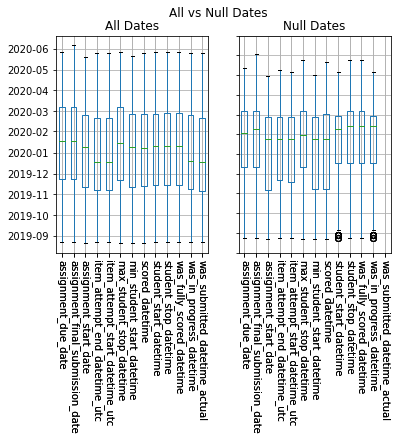

In [9]:
dual_date_boxplot(
    get_random_sample(filterDf),
    zeroDf,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- No change
  - assignment_start_date
  - min_student_start_datetime
  - scored_datetime
- Changes similar to earlier was_submitted_datetime_actual nulls
    - Median shifted one and half months from 1/15/2020 to 3/2020
    - All distributions right skewed
    - Majority of dates in the last half of school year

###### Categorical / Nominal Correlations Heatmap

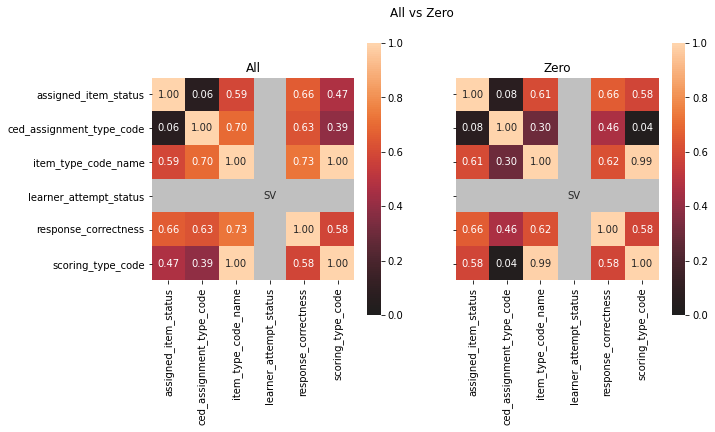

In [10]:
types = get_var_types()

dual_assoc_heatmap(
    get_random_sample(filterDf).select(*types['nominalVars']),
    zeroDf.select(*types['nominalVars']),
    'All',
    'Zero',
    'All vs Zero'
)

- No new correlations


###### Binary Correlations Heatmap

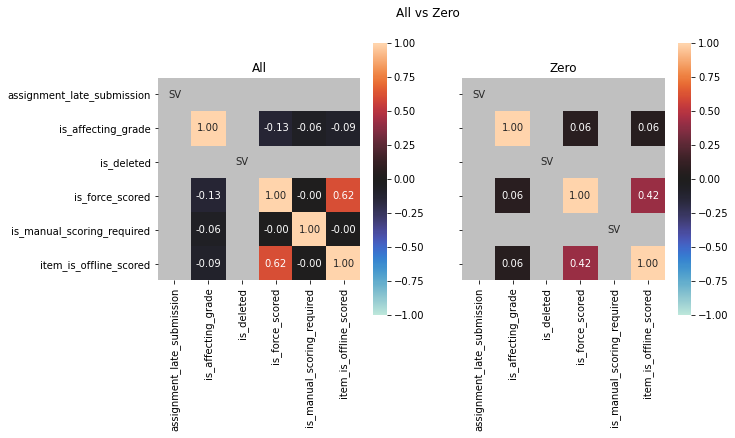

In [11]:
dual_assoc_heatmap(
    get_random_sample(filterDf).select(*types['binaryVars']),
    zeroDf.select(*types['binaryVars']),
    'All',
    'Zero',
    'All vs Zero'
)

- No new correlations


###### Conclusion

- 4,446 unrelated to final_score_unweighted missing at random
- Impute



In [12]:
finish_todo('Investigate 18469 null dates in was_submitted_datetime_actual')
add_todo('Impute 4446 of 18469 null dates in was_submitted_datetime_actual')